In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') # 避免sklearn的一些警告

# 读取数据

In [3]:
pf = pd.read_excel(r"C:\Users\Lzumi\Desktop\比赛相关\污染源\白酒行业参数一览表.xls", sheet_name='总表',encodig='utf8')

In [4]:
pf.head()

,单位详细名称,行业名称1,行业代码1,工业总产值(当年价格)(千元),用水量（万吨）,排水量（万吨）,是否进入污水处理厂,污染类别,原料名称,产品名称,...,污染治理设施实际运行参数二名称,污染治理设施实际运行参数二数值,污染治理设施实际运行参数三名称,污染治理设施实际运行参数三数值,污染物排放量,污染物排放量计量单位,K值计算结果,K值核算填报结果,是否有监测数据,监测法核算排放量（吨）
0,永川区清泉酒厂,白酒制造,1512,20.0,0.007,0.0063,三教工业园区污水处理厂,废水,高粱、稻米等,清香型白酒,...,污水处理设施总额定功率,4千瓦,污水处理设施耗电量,1300千瓦时/年,0.000297,吨,1.0,1.0,/,NaN
1,永川区清泉酒厂,白酒制造,1512,20.0,0.007,0.0063,三教工业园区污水处理厂,废水,高粱、稻米等,清香型白酒,...,污水处理设施总额定功率,4千瓦,污水处理设施耗电量,1300千瓦时/年,0.000015,吨,1.0,1.0,/,NaN
2,永川区清泉酒厂,白酒制造,1512,20.0,0.007,0.0063,三教工业园区污水处理厂,废水,高粱、稻米等,清香型白酒,...,污水处理设施总额定功率,4千瓦,污水处理设施耗电量,1300千瓦时/年,0.000004,吨,1.0,1.0,/,NaN
3,永川区清泉酒厂,白酒制造,1512,20.0,0.007,0.0063,三教工业园区污水处理厂,废水,高粱、稻米等,清香型白酒,...,污水处理设施总额定功率,4千瓦,污水处理设施耗电量,1300千瓦时/年,0.000001,吨,1.0,1.0,/,NaN
4,永川区清泉酒厂,白酒制造,1512,20.0,0.007,0.0063,三教工业园区污水处理厂,废气,柴油,蒸汽/热水/其他,...,NaN,NaN,NaN,NaN,0.004330,吨,NaN,1.0,/,NaN


In [5]:
pf.shape

(14384, 36)

In [6]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14384 entries, 0 to 14383
Data columns (total 36 columns):
单位详细名称             14384 non-null object
行业名称1              14384 non-null object
行业代码1              14384 non-null int64
工业总产值(当年价格)(千元)    14384 non-null float64
用水量（万吨）            14384 non-null object
排水量（万吨）            14384 non-null object
是否进入污水处理厂          14384 non-null object
污染类别               14384 non-null object
原料名称               14384 non-null object
产品名称               14384 non-null object
工艺名称               14384 non-null object
生产规模等级             14384 non-null object
产品产量               8499 non-null float64
产品产量的计量单位          14384 non-null object
原料/燃料用量            5913 non-null float64
原料/燃料用量的计量单位       14384 non-null object
污染物名称              14384 non-null object
污染物产污系数            14384 non-null object
污染物产污系数的计量单位       14384 non-null object
污染物产污系数中参数取值       11960 non-null float64
污染物产生量             12571 non-null float64
污染物产生量的计量单位        12571 non

# 特征分析，提取

In [7]:
np.where(pf.isnull().sum()/pf.shape[0]<0.5 )[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 30, 31, 33, 34], dtype=int64)

In [8]:
pf['行业代码1'].unique() # 说明都是白酒行业的

array([1512], dtype=int64)

In [9]:
pf['工业总产值(当年价格)(千元)'].dtype

dtype('float64')

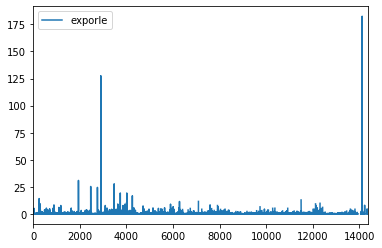

In [10]:
%matplotlib inline
exporle = pd.DataFrame({"exporle":pf["污染物排放量"]})
exporle.plot()

In [12]:
exporle.describe()

,exporle
count,11911.000000
mean,0.222339
std,2.217553
min,0.000000
25%,0.000613
50%,0.010290
75%,0.089600
max,182.509182


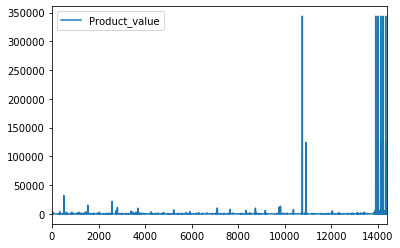

In [10]:
%matplotlib inline
product_value = pd.DataFrame({"Product_value":pf["工业总产值(当年价格)(千元)"]})
product_value.plot()

In [11]:
product_value.describe()

,Product_value
count,14384.000000
mean,730.255165
std,10439.048406
min,1.000000
25%,40.000000
50%,100.000000
75%,200.000000
max,343748.300000


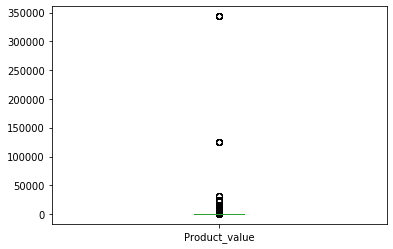

In [12]:
product_value.plot(kind="box")

In [15]:
dateset = pf[['工业总产值(当年价格)(千元)']]
dateset.head()

,工业总产值(当年价格)(千元)
0,20.0
1,20.0
2,20.0
3,20.0
4,20.0


In [20]:
pf.apply(lambda x: x['用水量（万吨）'] > x['排水量（万吨）'], axis=1).count()  # 用水量没有错误

14384

In [36]:
water_use = pd.DataFrame()
water_use['排水量（万吨）'] = pf['排水量（万吨）'].apply(lambda x : x if x!= '/' else 0)
water_use['用水量（万吨）'] = pf['用水量（万吨）'].apply(lambda x : x if x!= '/' else 0)
water_use.head()

,排水量（万吨）,用水量（万吨）
0,0.0063,0.007
1,0.0063,0.007
2,0.0063,0.007
3,0.0063,0.007
4,0.0063,0.007


In [42]:
water_use['用水量-排水量(万吨)'] = water_use.apply(lambda x: x['用水量（万吨）'] - x['排水量（万吨）'], axis=1)
water_use.head()

,排水量（万吨）,用水量（万吨）,用水量-排水量(万吨)
0,0.0063,0.007,0.0007
1,0.0063,0.007,0.0007
2,0.0063,0.007,0.0007
3,0.0063,0.007,0.0007
4,0.0063,0.007,0.0007


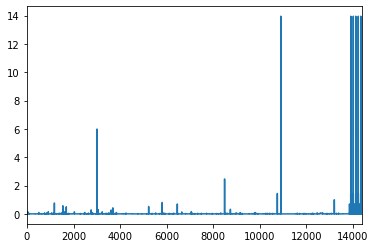

In [44]:
water_use['用水量-排水量(万吨)'].plot()

In [54]:
len(set(pf['是否进入污水处理厂']))  # 包含用污水处理厂的数量

207

In [64]:
isdeal = pd.DataFrame()
isdeal['是否进入污水处理厂'] = pf['是否进入污水处理厂'].apply(lambda x: 1 if x!='/' else 0)